## 20. Histogram for continues variable

- shows the frequency distribution 

##### Notes:
#### plt.hist returns n,bins,patches!

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

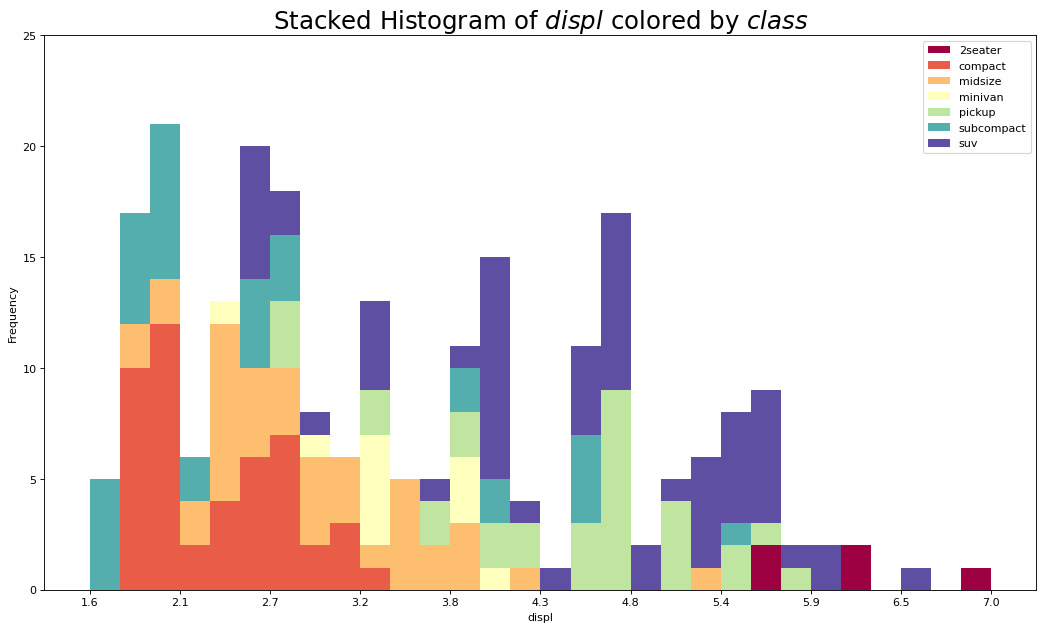

In [53]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
#*****
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

In [54]:
colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.3280276816608997, 0.6805074971164936, 0.6802768166089965, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

## 21. Historgram for Categorical Variable

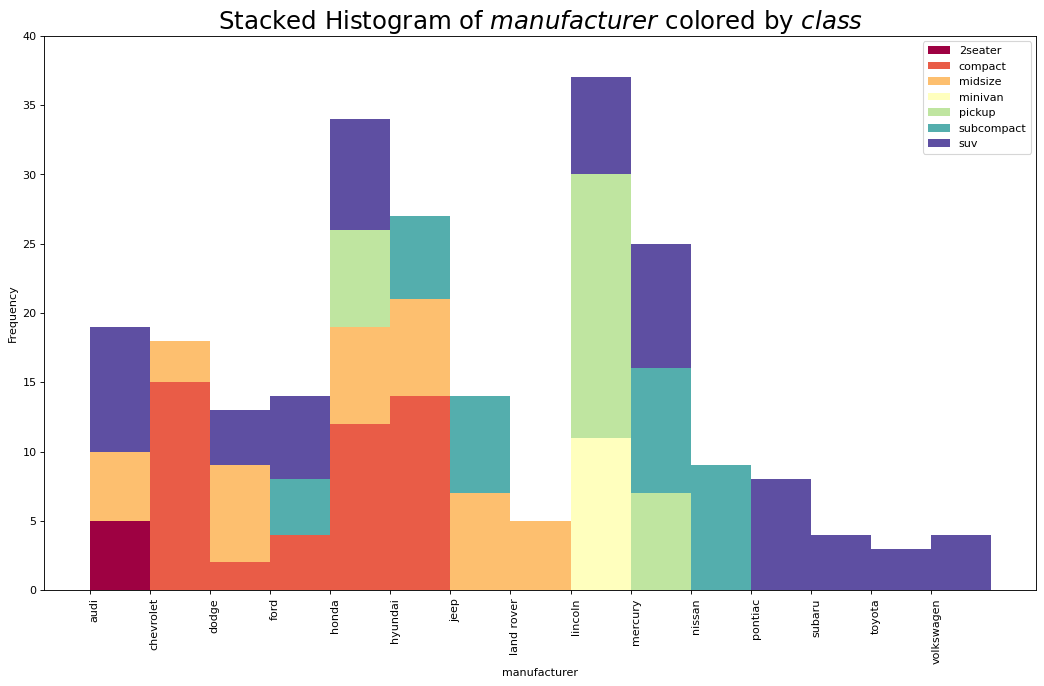

In [67]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare data
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
plt.xticks(ticks=bins[:-1], labels=np.unique(df[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

## 22. Density Plot

- a commonly used tool visualise the distribution of a continuous variable
- kernel density estimate (KDE) plot in seaborn

In [68]:
#load data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


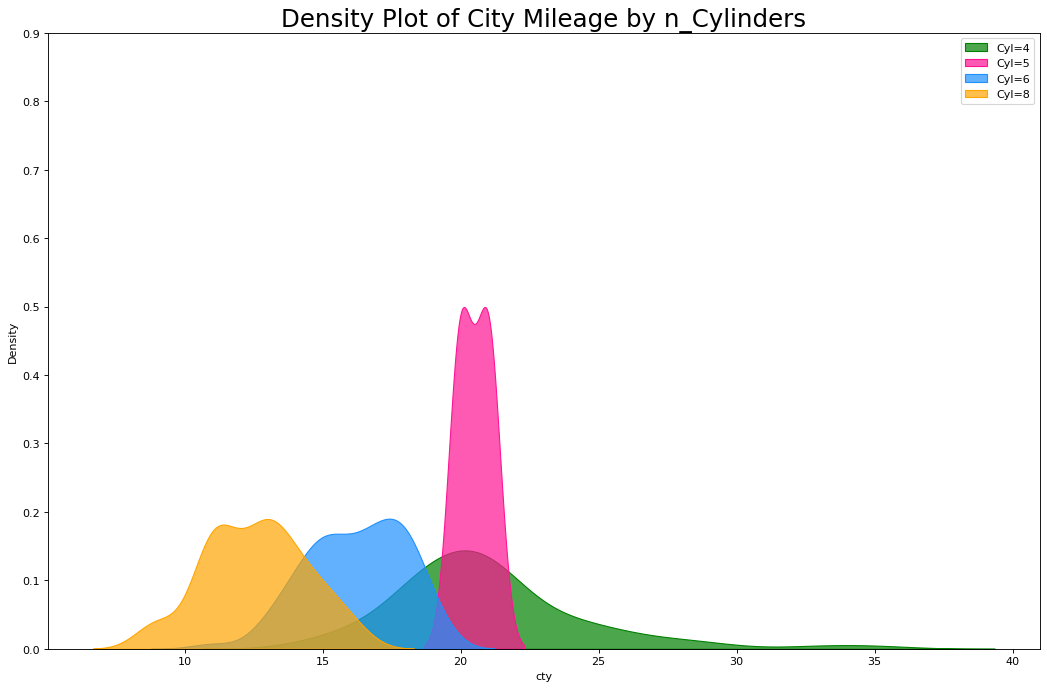

In [74]:
#Draw plots
plt.figure(figsize=(16,10),dpi=80)
sns.kdeplot(df.loc[df['cyl']==4,'cty'],shade=True,color='g',label='Cyl=4',alpha=0.7)
sns.kdeplot(df.loc[df['cyl']==5,'cty'],shade=True,color='deeppink',label='Cyl=5',alpha=0.7)
sns.kdeplot(df.loc[df['cyl']==6,'cty'],shade=True,color='dodgerblue',label='Cyl=6',alpha=0.7)
sns.kdeplot(df.loc[df['cyl']==8,'cty'],shade=True,color='orange',label='Cyl=8',alpha=0.7)
# Decoration
plt.ylim(0, 0.9)
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

warnings.filterwarnings('ignore')

## 23. Density Curves with Histogram

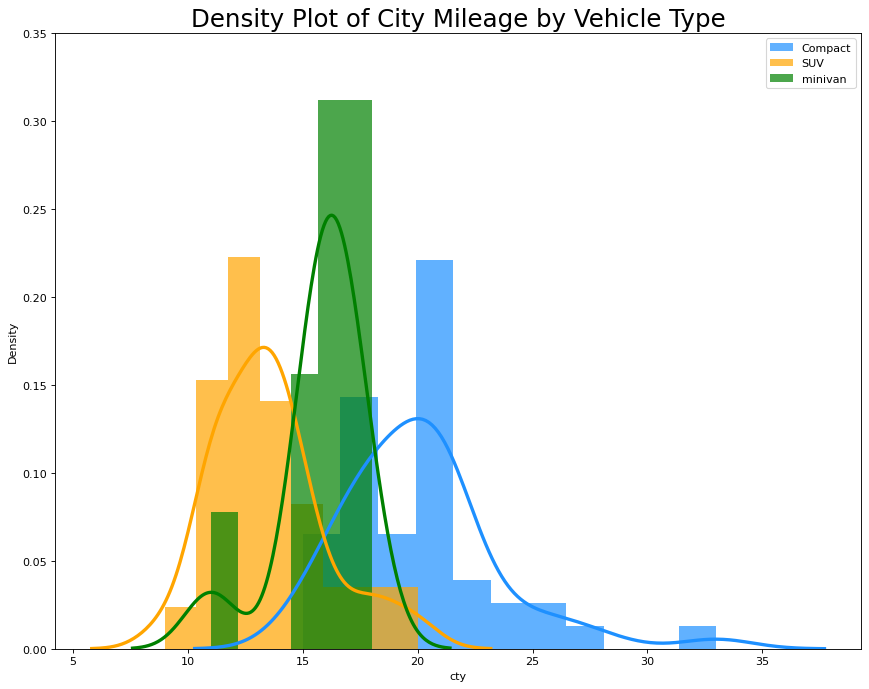

In [75]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
#draw
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.35)

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.legend()
plt.show()


## 24. Joy Plot

- allowed overlapping of different density curves

<Figure size 1280x800 with 0 Axes>

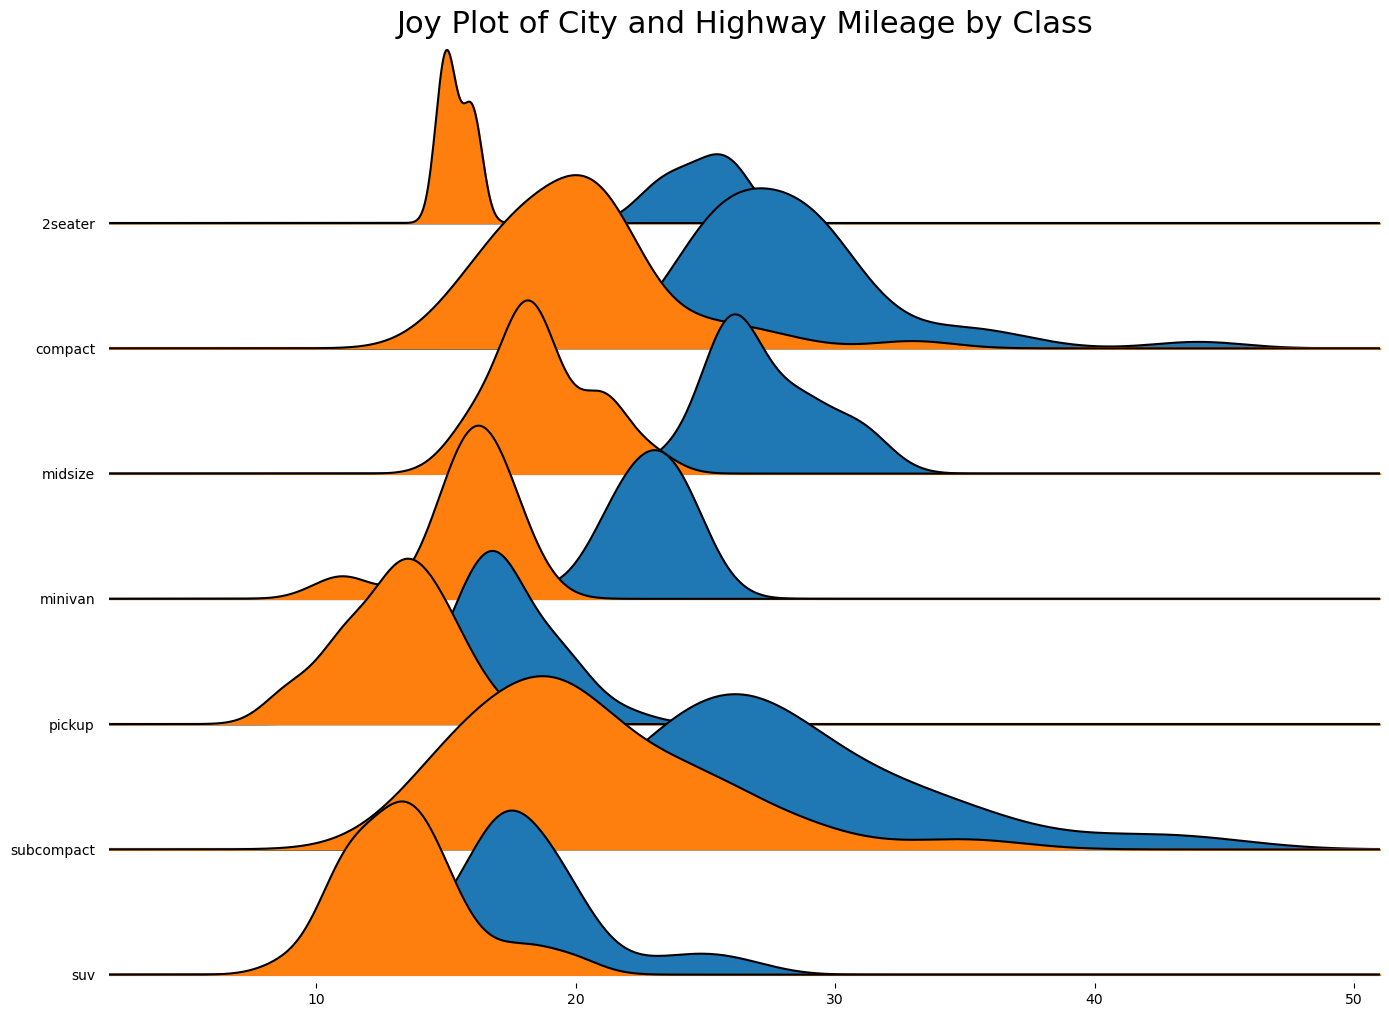

In [3]:
import joypy
# Import Data
mpg = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.show()

## 25. Distributed Dot Plot

In [20]:
##have issue with the repeat method...

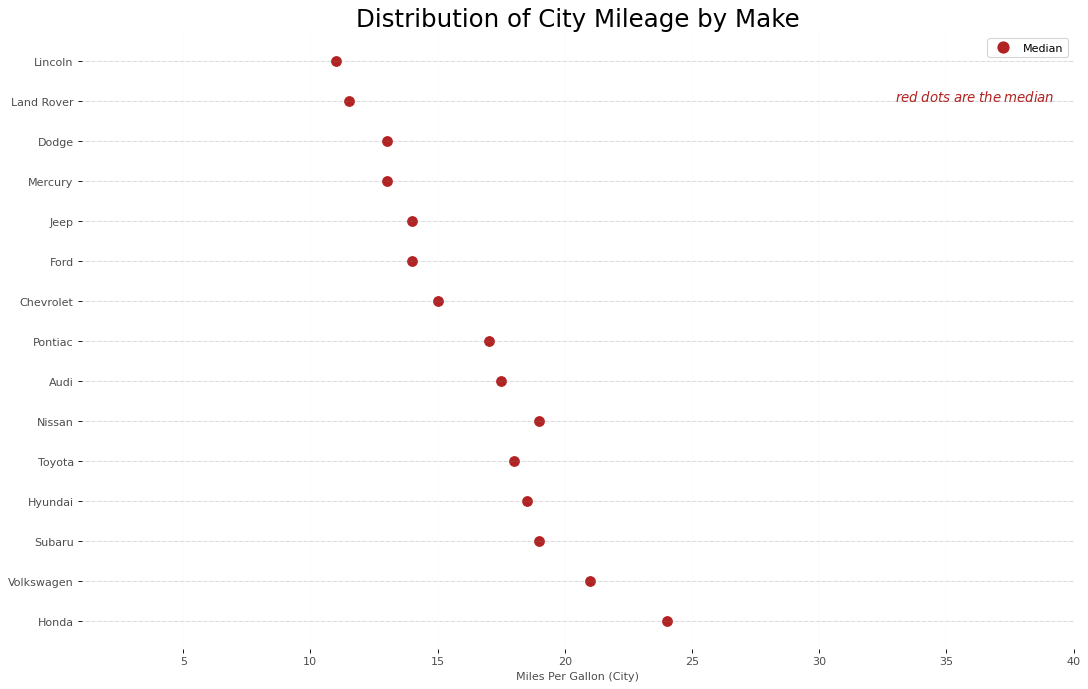

In [21]:
import matplotlib.patches as mpatches

# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
cyl_colors = {4:'tab:red', 5:'tab:green', 6:'tab:blue', 8:'tab:orange'}
df_raw['cyl_color'] = df_raw.cyl.map(cyl_colors)

# Mean and Median city mileage by make
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', ascending=False, inplace=True)
df.reset_index(inplace=True)
df_median = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.median())

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=0, xmax=40, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

# Draw the Dots
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer==make, :]
    #ax.scatter(y=np.repeat(i, df_make.shape[0]), x='cty', data=df_make, s=75, edgecolors='gray', c='w', alpha=0.5)
    ax.scatter(y=i, x='cty', data=df_median.loc[df_median.index==make, :], s=75, c='firebrick')

# Annotate    
ax.text(33, 13, "$red \; dots \; are \; the \: median$", fontdict={'size':12}, color='firebrick')

# Decorations
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='firebrick', label="Median")
plt.legend(handles=red_patch)
ax.set_title('Distribution of City Mileage by Make', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon (City)', alpha=0.7)
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.set_xlim(1, 40)
plt.xticks(alpha=0.7)
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)   
plt.grid(axis='both', alpha=.4, linewidth=.1)
plt.show()

## 26. Boxplot

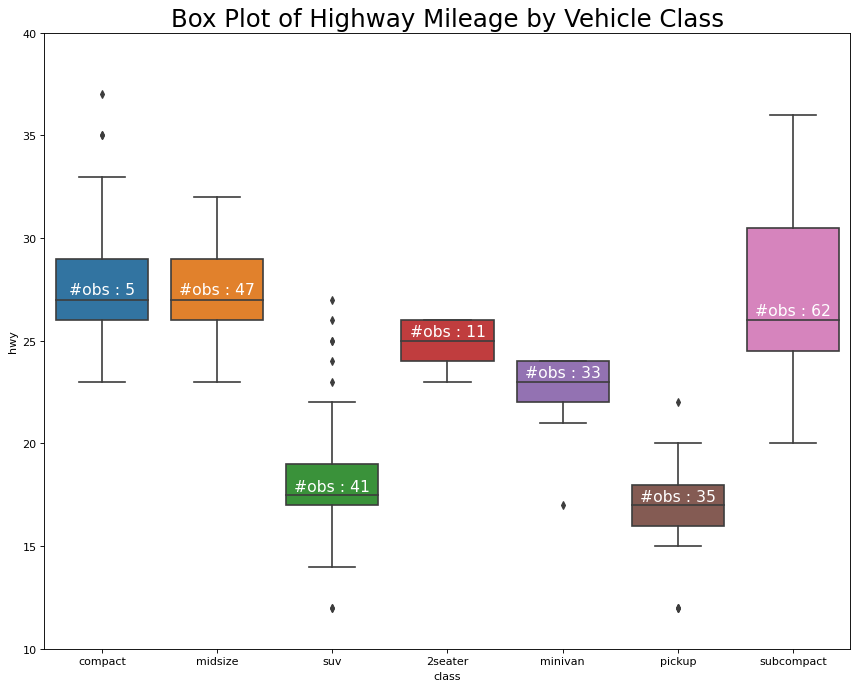

In [24]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, notch=False)
# Add N Obs inside boxplot (optional)
#######################
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(df,group_col='class',y='hwy')    
########################
# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()

## 27. Dot+Box plot

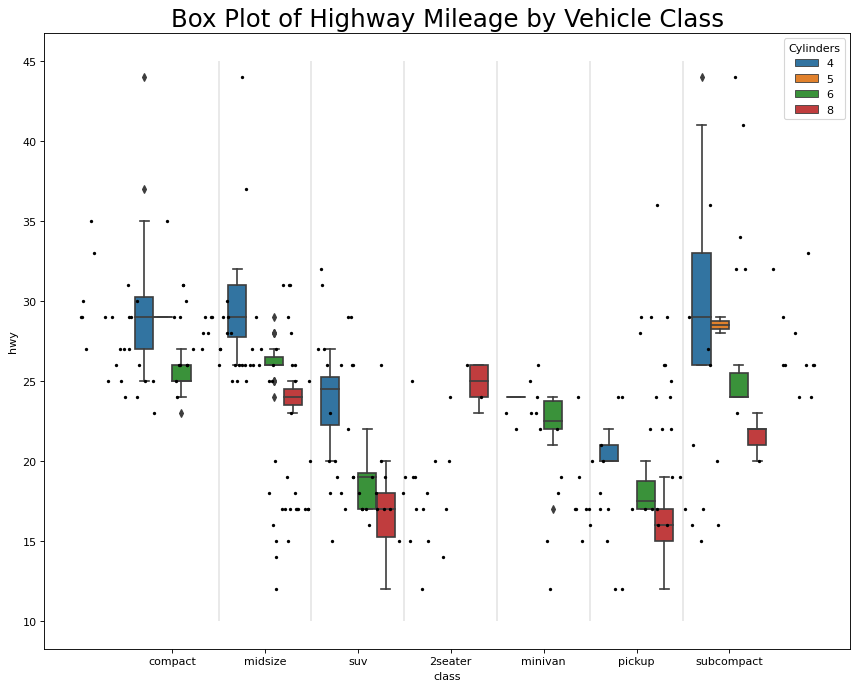

In [25]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, hue='cyl')
sns.stripplot(x='class', y='hwy', data=df, color='black', size=3, jitter=1)

for i in range(len(df['class'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.legend(title='Cylinders')
plt.show()


## 28. Violin Plot

Violin plot is a visually pleasing alternative to box plots. The shape or area of the violin depends on the number of observations it holds. However, the violin plots can be harder to read and it not commonly used in professional settings.

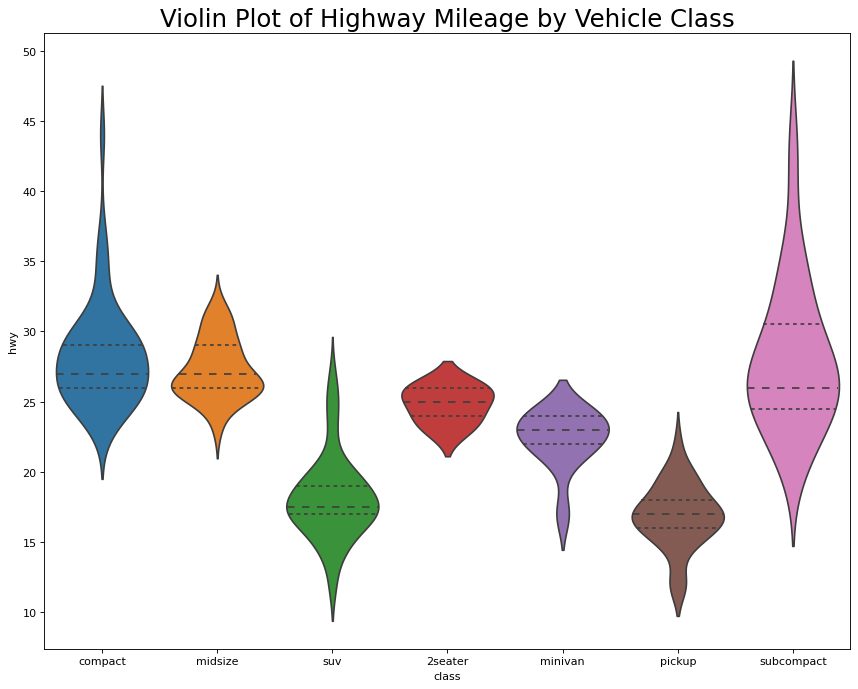

In [26]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
#Draw plot
plt.figure(figsize=(13,10),dpi=80)
sns.violinplot(x='class',y='hwy',data=df,scale='width',inner='quartile')
#Decoration
plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.show()

## 29. Population Pyramid

stage by stage

In [27]:
# Read data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")


In [28]:
df

,Stage,Gender,Users
0,Stage 01: Browsers,Male,-1.492762e+07
1,Stage 02: Unbounced Users,Male,-1.286266e+07
2,Stage 03: Email Signups,Male,-1.136190e+07
3,Stage 04: Email Confirmed,Male,-9.411708e+06
4,Stage 05: Campaign-Email Opens,Male,-8.074317e+06
5,Stage 06: Campaign-Email Clickthroughs,Male,-6.958512e+06
6,Stage 07: Buy Button Page,Male,-6.045363e+06
7,Stage 08: Buy Button Clickers,Male,-5.029954e+06
8,Stage 09: Cart Confirmation Page,Male,-4.008034e+06
9,Stage 10: Address Verification Page,Male,-3.172555e+06


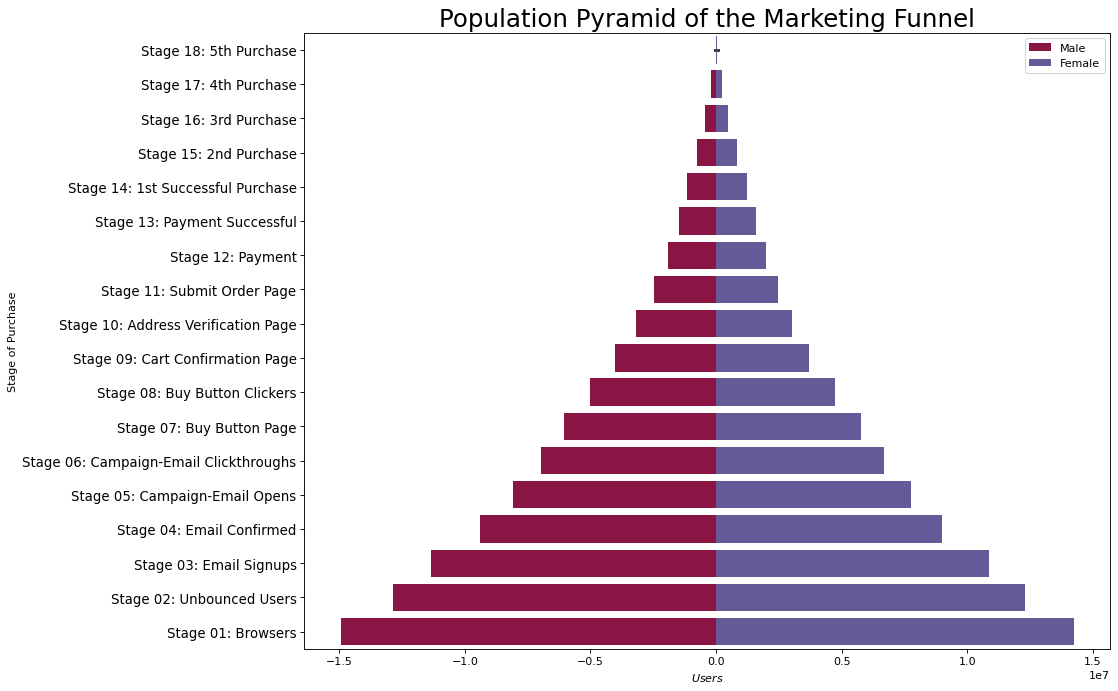

In [32]:
#Draw plot
plt.figure(figsize=(13,10),dpi=80)
group_col='Gender'
#reverse the order
order_of_bars = df.Stage.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]

for c, group in zip(colors,df[group_col].unique()):
    sns.barplot(x='Users',y='Stage',data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)

# Decorations    
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()





## 30. Categorical plots

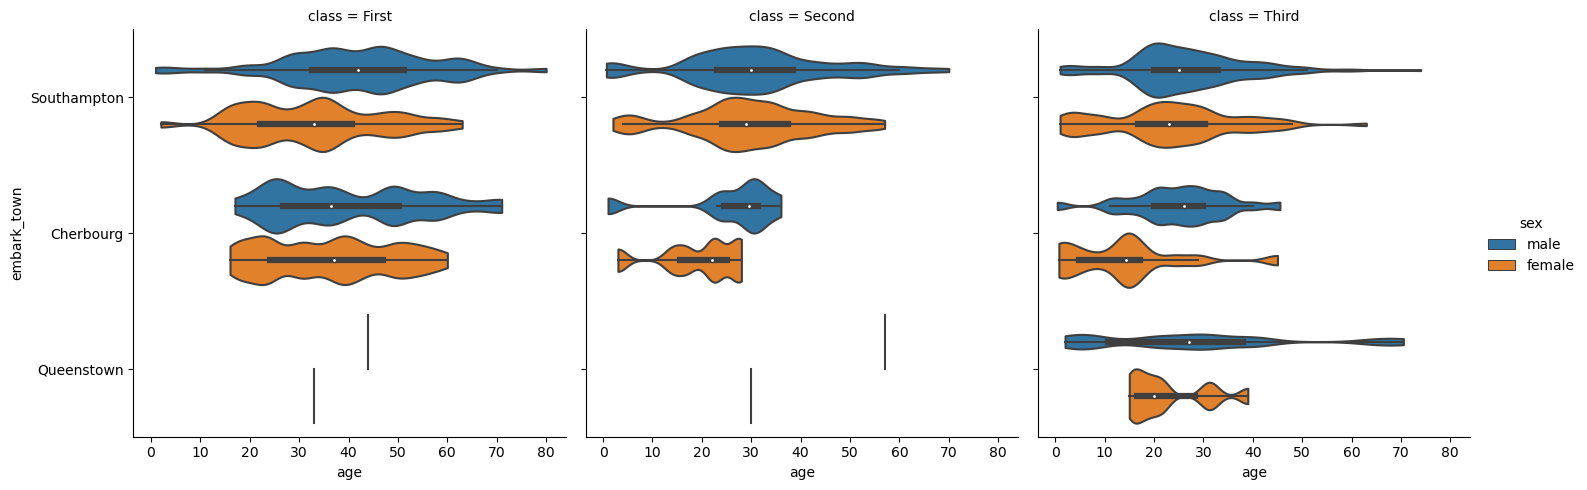

In [41]:

titanic = sns.load_dataset("titanic")

# Plot
sns.catplot(x="age", y="embark_town",
            hue="sex", col="class",
            data=titanic[titanic.embark_town.notnull()],
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)
